In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the Titanic dataset
data = pd.read_csv('titanic.csv')

In [3]:
# Perform exploratory data analysis
# Display the first few rows of the dataset
print(data.head())


   PassengerId  Survived  Pclass   
0          892         0       3  \
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch   
0                              Kelly, Mr. James    male  34.5      0      0  \
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [4]:
# Check the dimensions of the dataset
print("Dataset Dimensions:", data.shape)


Dataset Dimensions: (418, 12)


In [5]:
# Check the data types of each column
print(data.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [6]:
# Check for missing values
print("Missing Values:")
print(data.isnull().sum())


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:

# Data preprocessing
# Remove irrelevant columns
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)


In [8]:
# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


In [9]:
# Encode categorical variables
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])


In [10]:
# Statistical summary of the dataset
print(data.describe())


         Survived      Pclass         Sex         Age       SibSp       Parch   
count  418.000000  418.000000  418.000000  418.000000  418.000000  418.000000  \
mean     0.363636    2.265550    0.636364   29.599282    0.447368    0.392344   
std      0.481622    0.841838    0.481622   12.703770    0.896760    0.981429   
min      0.000000    1.000000    0.000000    0.170000    0.000000    0.000000   
25%      0.000000    1.000000    0.000000   23.000000    0.000000    0.000000   
50%      0.000000    3.000000    1.000000   27.000000    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   35.750000    1.000000    0.000000   
max      1.000000    3.000000    1.000000   76.000000    8.000000    9.000000   

             Fare    Embarked  
count  417.000000  418.000000  
mean    35.627188    1.401914  
std     55.907576    0.854496  
min      0.000000    0.000000  
25%      7.895800    1.000000  
50%     14.454200    2.000000  
75%     31.500000    2.000000  
max    512.329

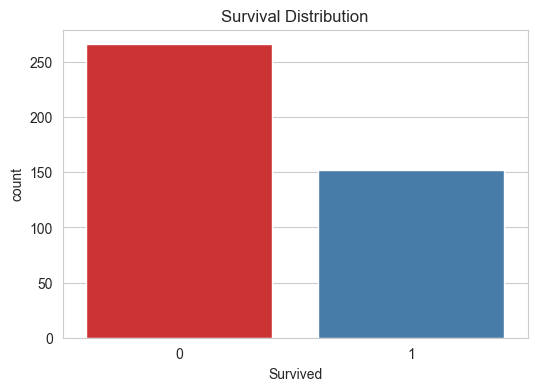

In [11]:
# Data visualization
# Plot the distribution of survival
sns.set_style('whitegrid')
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=data, palette='Set1')
plt.title('Survival Distribution')
plt.show()

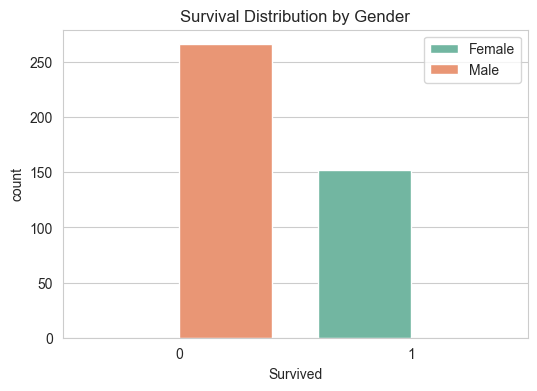

In [12]:
# Plot the survival distribution based on gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Sex', data=data, palette='Set2')
plt.title('Survival Distribution by Gender')
plt.legend(['Female', 'Male'])
plt.show()

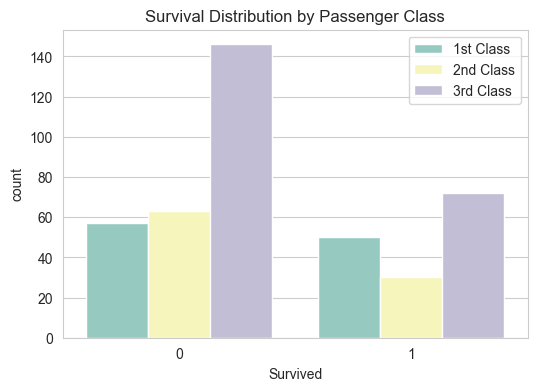

In [13]:
# Plot the survival distribution based on passenger class
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Pclass', data=data, palette='Set3')
plt.title('Survival Distribution by Passenger Class')
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.show()

C:\Users\Firdaush Alam\AppData\Local\Temp\ipykernel_4012\3098505625.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='Age', data=data, kde=True, palette='Set1')


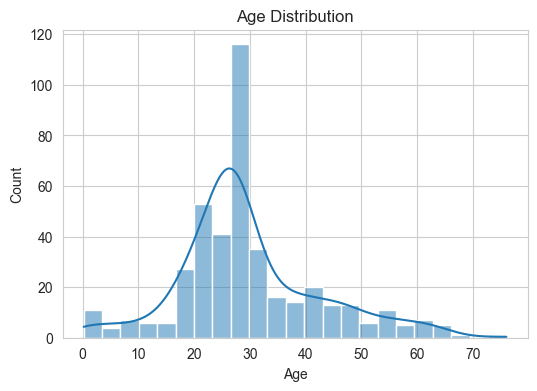

In [14]:
# Plot the age distribution of passengers
plt.figure(figsize=(6, 4))
sns.histplot(x='Age', data=data, kde=True, palette='Set1')
plt.title('Age Distribution')
plt.show()


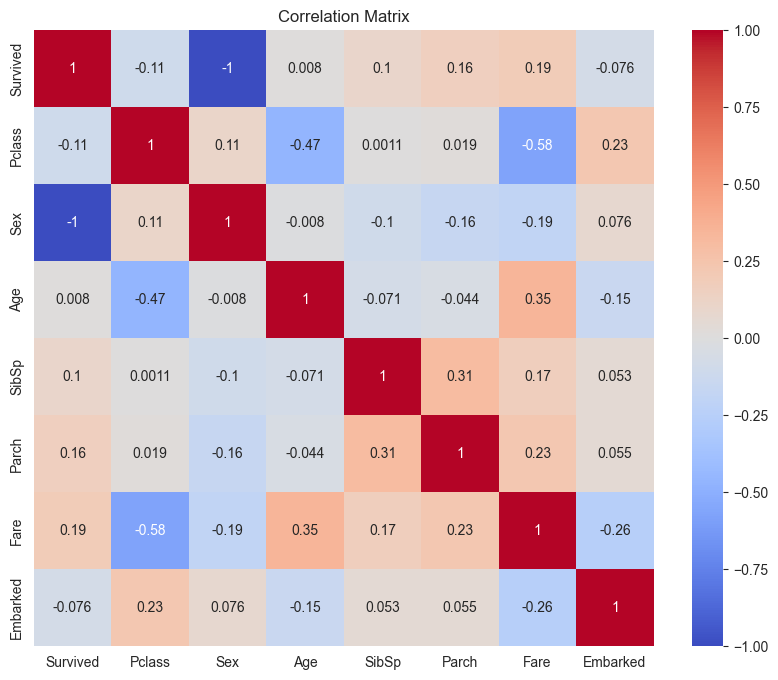

In [15]:
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()